# Machine Learning Classification Model

In [ ]:
???

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


## Load the data

In [2]:
import pandas as pd

df = pd.read_excel('data/MSFT_preprocessed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2024-06-18,449.709991,450.140015,444.890015,446.339996,17112500,-0.143591,DOWN
2024-06-20,446.299988,446.529999,441.269989,445.700012,19877400,0.907107,UP
2024-06-21,447.380005,450.579987,446.510010,449.779999,34486200,-0.471326,DOWN


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [3]:
target = df.change_tomorrow_direction
target2 =df.change_tomorrow_direction
target3 =df.change_tomorrow_direction
explanatory = df.drop(columns=['change_tomorrow','change_tomorrow_direction'])
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700
...,...,...,...,...,...
2024-06-18,449.709991,450.140015,444.890015,446.339996,17112500
2024-06-20,446.299988,446.529999,441.269989,445.700012,19877400
2024-06-21,447.380005,450.579987,446.510010,449.779999,34486200


### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [4]:
from sklearn.tree import DecisionTreeClassifier #Classifier coz we wanna predict a category of up and down
model_dt7 = DecisionTreeClassifier(max_depth=7) #max_depth will limit the decision tree depth 
model_dt7.fit(X=explanatory,y=target)


model_dt14 = DecisionTreeClassifier(max_depth=14)
model_dt14.fit(X=explanatory,y=target2)

model_dt = DecisionTreeClassifier()
model_dt.fit(X=explanatory,y=target3)
[target, target2, target3]



[Date
 2016-12-08      UP
 2016-12-09      UP
 2016-12-12      UP
 2016-12-13    DOWN
 2016-12-14    DOWN
               ... 
 2024-06-18    DOWN
 2024-06-20      UP
 2024-06-21    DOWN
 2024-06-24      UP
 2024-06-25      UP
 Name: change_tomorrow_direction, Length: 1897, dtype: object,
 Date
 2016-12-08      UP
 2016-12-09      UP
 2016-12-12      UP
 2016-12-13    DOWN
 2016-12-14    DOWN
               ... 
 2024-06-18    DOWN
 2024-06-20      UP
 2024-06-21    DOWN
 2024-06-24      UP
 2024-06-25      UP
 Name: change_tomorrow_direction, Length: 1897, dtype: object,
 Date
 2016-12-08      UP
 2016-12-09      UP
 2016-12-12      UP
 2016-12-13    DOWN
 2016-12-14    DOWN
               ... 
 2024-06-18    DOWN
 2024-06-20      UP
 2024-06-21    DOWN
 2024-06-24      UP
 2024-06-25      UP
 Name: change_tomorrow_direction, Length: 1897, dtype: object]

### Visualize the model

[Text(0.4841262033924205, 0.9852941176470589, 'x[3] <= 233.525\ngini = 0.497\nsamples = 1897\nvalue = [877, 1020]'),
 Text(0.374879342400163, 0.9558823529411765, 'x[4] <= 46663750.0\ngini = 0.492\nsamples = 1074\nvalue = [467, 607]'),
 Text(0.4295027728962918, 0.9705882352941178, 'True  '),
 Text(0.24136422677261613, 0.9264705882352942, 'x[4] <= 32050200.0\ngini = 0.488\nsamples = 965\nvalue = [407, 558]'),
 Text(0.08983929299103505, 0.8970588235294118, 'x[4] <= 31751600.0\ngini = 0.495\nsamples = 759\nvalue = [342.0, 417.0]'),
 Text(0.08723130603096985, 0.8676470588235294, 'x[1] <= 65.195\ngini = 0.494\nsamples = 753\nvalue = [336.0, 417.0]'),
 Text(0.030317848410757946, 0.8382352941176471, 'x[3] <= 64.45\ngini = 0.485\nsamples = 58\nvalue = [34, 24]'),
 Text(0.021515892420537898, 0.8088235294117647, 'x[2] <= 63.43\ngini = 0.498\nsamples = 43\nvalue = [20.0, 23.0]'),
 Text(0.0117359413202934, 0.7794117647058824, 'x[0] <= 62.27\ngini = 0.489\nsamples = 33\nvalue = [19, 14]'),
 Text(0.0

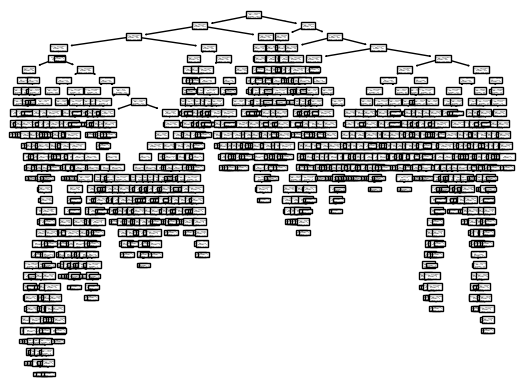

In [18]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt)


### Calculate the predictions

In [6]:
explanatory
y_pred7 = model_dt7.predict(X=explanatory)
y_pred14 = model_dt14.predict(X=explanatory)
y_pred = model_dt.predict(X=explanatory)
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['pred7'] = y_pred7
df_predictions['pred14'] = y_pred14
df_predictions['pred'] = y_pred

In [66]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = ???
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


### Evaluate the model: compare predictions with the reality

In [20]:
comp = df_predictions['change_tomorrow_direction'] == df_predictions['pred']

[comp.value_counts()]
accuracy = comp.sum()/len(comp)
accuracy

1.0

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [22]:
import os
import pickle
os.makedirs('models') 
model_dt

FileExistsError: [Errno 17] File exists: 'models'

In [21]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)